In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import json
import statsmodels.formula.api as smf
import statsmodels.api as sm

if os.getenv("PUIDATA") is None:
    print("$PUIDATA to point to set PUIdata dir")

%pylab inline
#pl.rcParams.update(s)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


# Idea: 

### On average, men take shorter bike trips than females.


# Null Hypothesis:

### The average trip length for males is shorter than or equal to the average trip length for females.


# Alternative Hypothesis: 

### The average trip length for males is longer than the average trip length for females.

#### significance level  $\alpha=0.05$


In [2]:
# Call the environmental variable PUIdata
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


In [3]:
# get citibike data from CUSP data facility

CUSP = '/gws/open/Student/cikibike'
print(CUSP)

/gws/open/Student/cikibike


In [4]:
# Obtain the citibike data from July 2017 and read the data
# into a pandas DataFrame and convert the start and end data
# into pandas datetime.

url = (CUSP + "/201707-citibike-tripdata.csv.zip")
print(url)
cbData = pd.read_csv("/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip")
cbData['startdate'] = pd.to_datetime(cbData['starttime'])
cbData['enddate'] = pd.to_datetime(cbData['stoptime'])
cbData.head()

/gws/open/Student/cikibike/201707-citibike-tripdata.csv.zip


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,enddate
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [5]:
cbData.dtypes

tripduration                        int64
starttime                          object
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
startdate                  datetime64[ns]
enddate                    datetime64[ns]
dtype: object

In [6]:
cbData.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'startdate', 'enddate'],
      dtype='object')

In [7]:
# drop the columns that are not needed
cbData.drop(['start station id','starttime','stoptime', 'start station name',
         'start station latitude', 'start station longitude', 'end station id',
         'end station name', 'end station latitude', 'birth year', 'end station longitude',
         'bikeid', 'usertype'], axis=1, inplace=True)

cbData.head()

,tripduration,gender,startdate,enddate
0,364,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [8]:
# Convert trip duration from seconds to minutes

cbData['tripduration'] = cbData['tripduration'] / 60

cbData.head()

,tripduration,gender,startdate,enddate
0,6.066667,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,35.700000,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,5.466667,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,42.166667,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,42.233333,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [9]:
# convert startdate into just date and remove the time

cbData['startdate'] = cbData['startdate'].dt.date

cbData.head()

,tripduration,gender,startdate,enddate
0,6.066667,1,2017-07-01,2017-07-01 00:06:05
1,35.700000,1,2017-07-01,2017-07-01 00:35:46
2,5.466667,2,2017-07-01,2017-07-01 00:05:37
3,42.166667,1,2017-07-01,2017-07-01 00:42:22
4,42.233333,2,2017-07-01,2017-07-01 00:42:29


In [10]:
#create a dataframe that only inclues tripduraction and gender

cbGender = cbData[['tripduration','gender']]

cbGender.head()

,tripduration,gender
0,6.066667,1
1,35.700000,1
2,5.466667,2
3,42.166667,1
4,42.233333,2


In [11]:
# replace 1 with Male and 2 with Female

cbGender.gender = cbGender.gender.replace(1,"Male")
cbGender.gender = cbGender.gender.replace(2,"Female")
cbGender.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tripduration,gender
0,6.066667,Male
1,35.700000,Male
2,5.466667,Female
3,42.166667,Male
4,42.233333,Female


In [12]:
# see total count for number of tripdurations and gender
histTotal = cbGender[cbGender["tripduration"]<40]
histTotal.head()
histTotal.count()

tripduration    1673371
gender          1673371
dtype: int64

In [13]:
# see how many males are in the dataframe

histMale = histTotal[histTotal["gender"] == "Male"]
histMale.head()
histMale.count()

tripduration    1076311
gender          1076311
dtype: int64

In [14]:
histFemale = histTotal[histTotal["gender"] == "Female"]
histFemale.head()
histFemale.count()

tripduration    388897
gender          388897
dtype: int64

In [15]:
# create a dataframe that is average male trip duration and startdate

cbMale = cbData[cbData.gender == 1]
cbMale = cbMale.groupby('startdate').mean()
cbMale.drop(['gender'], axis=1, inplace=True)
cbMale.columns = ['Average Male Trip Duration']

cbMale.head()

,Average Male Trip Duration
startdate,
2017-07-01,18.111268
2017-07-02,20.141165
2017-07-03,18.276041
2017-07-04,22.380926
2017-07-05,15.635412


In [16]:
cbFemale = cbData[cbData.gender == 2]
cbFemale = cbFemale.groupby('startdate').mean()
cbFemale.drop(['gender'], axis=1, inplace=True)
cbFemale.columns = ['Average Female Trip Duration']

cbFemale.head()

,Average Female Trip Duration
startdate,
2017-07-01,21.782166
2017-07-02,24.100578
2017-07-03,19.129823
2017-07-04,19.975015
2017-07-05,18.953602


(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text yticklabel objects>)

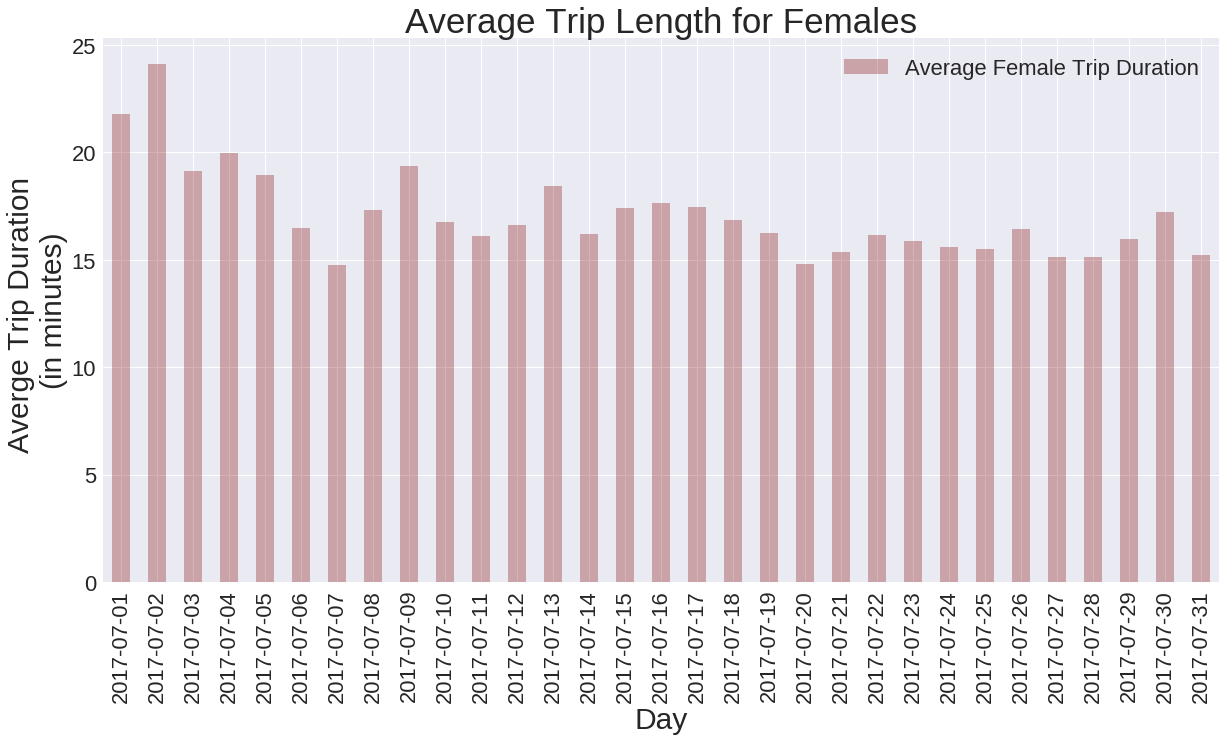

In [17]:
#plot a bar graph of Average Female Trip Duration

fig = figsize(20,10)

ax1 = cbFemale.plot(kind = "bar", color = 'Maroon', alpha = 0.3)
ax1.set_ylabel("Averge Trip Duration \n(in minutes)", fontsize = 30)
ax1.set_xlabel("Day", fontsize =30)
ax1.set_title('Average Trip Length for Females', fontsize = 35)
ax1.legend(fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)



### Figure 1: Daily Average Trip Length for Females

#### In this plot you can see the average trip duration for the each day of July.  Most the trips each day average 15-20 minutes.

(array([  0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 6 Text yticklabel objects>)

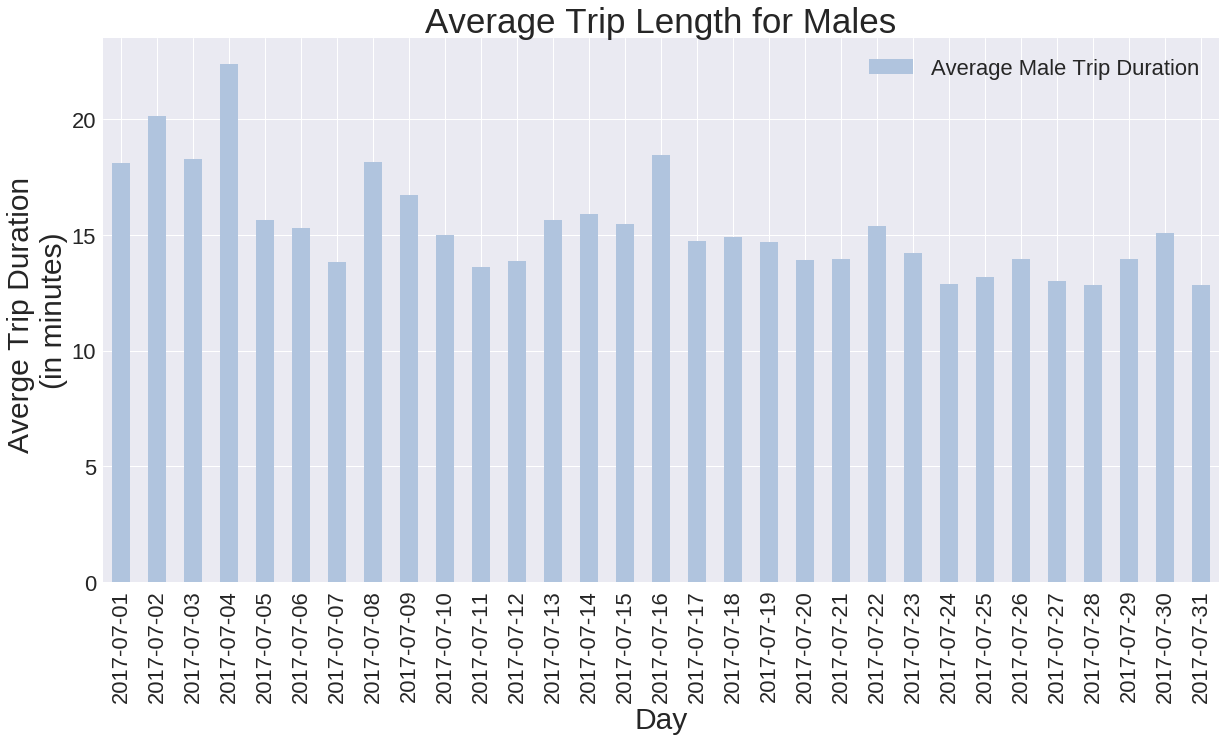

In [18]:
#plot a bar graph of average male trip duration

fig = figsize(20,10)

ax2 = cbMale.plot(kind = "bar", color = 'lightsteelblue')
ax2.set_ylabel("Averge Trip Duration \n(in minutes)", fontsize = 30)
ax2.set_xlabel("Day", fontsize =30)
ax2.set_title('Average Trip Length for Males', fontsize = 35)
ax2.legend(fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


### Figure 2: Daily average trip length for Males

#### In this plot you can see the average trip during for the month of July 2017.  You can see in this plot that the average tripduration for males most days of the month is between 10-17 minutes.

In [19]:
# Create a dataframe that combines both male and female average
# trip durations

genderTD = pd.concat([cbFemale, cbMale], axis=1)

genderTD.head()

,Average Female Trip Duration,Average Male Trip Duration
startdate,,
2017-07-01,21.782166,18.111268
2017-07-02,24.100578,20.141165
2017-07-03,19.129823,18.276041
2017-07-04,19.975015,22.380926
2017-07-05,18.953602,15.635412


In [20]:
cbFemale.columns

Index(['Average Female Trip Duration'], dtype='object')

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text yticklabel objects>)

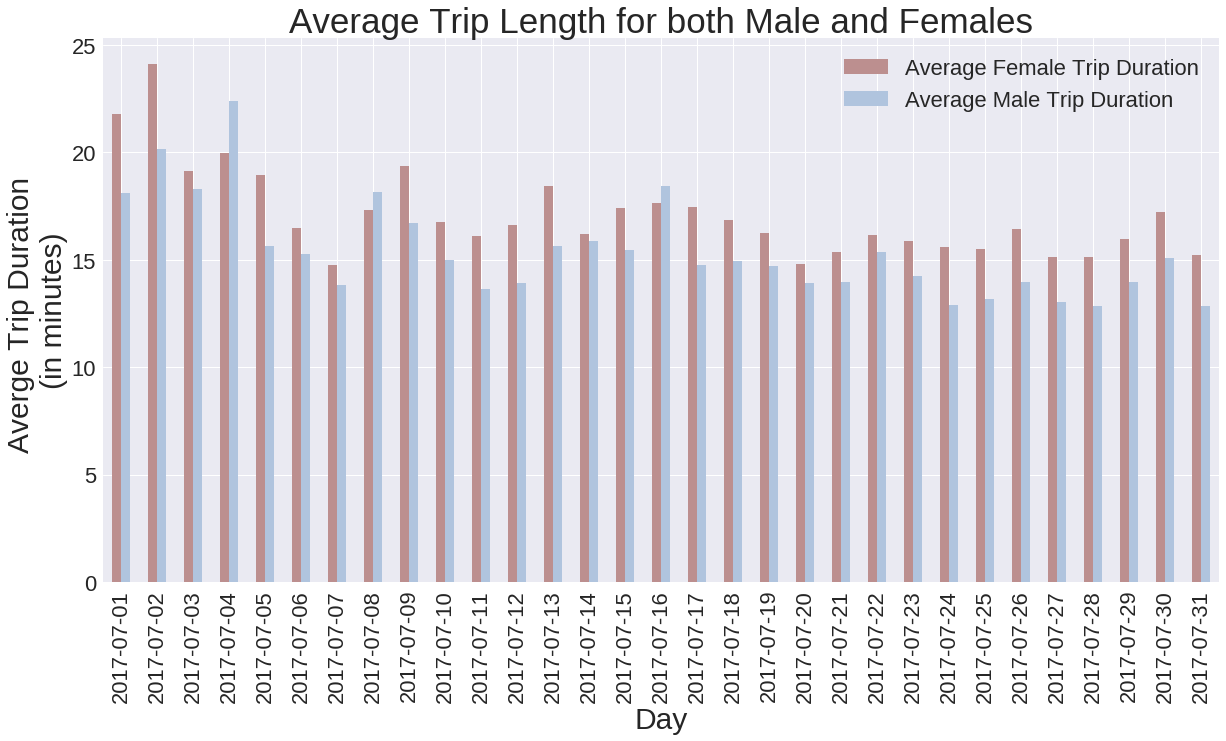

In [21]:
fig = figsize(20,10)

ax3 = genderTD.plot(kind = "bar", color = ('rosybrown', 'lightsteelblue'))
ax3.set_ylabel("Averge Trip Duration \n(in minutes)", fontsize = 30)
ax3.set_xlabel("Day", fontsize =30)
ax3.set_title('Average Trip Length for both Male and Females', fontsize = 35)
ax3.legend(fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


### Figure 3: Average Trip Length for Both Male and Female's during the Month of July

#### Looking at the bar graph, three days of the month (July 4, July 8, and July16), Females had a lower average trip duration than males.  Other than those three days, Males had a shorter trip duration than females.

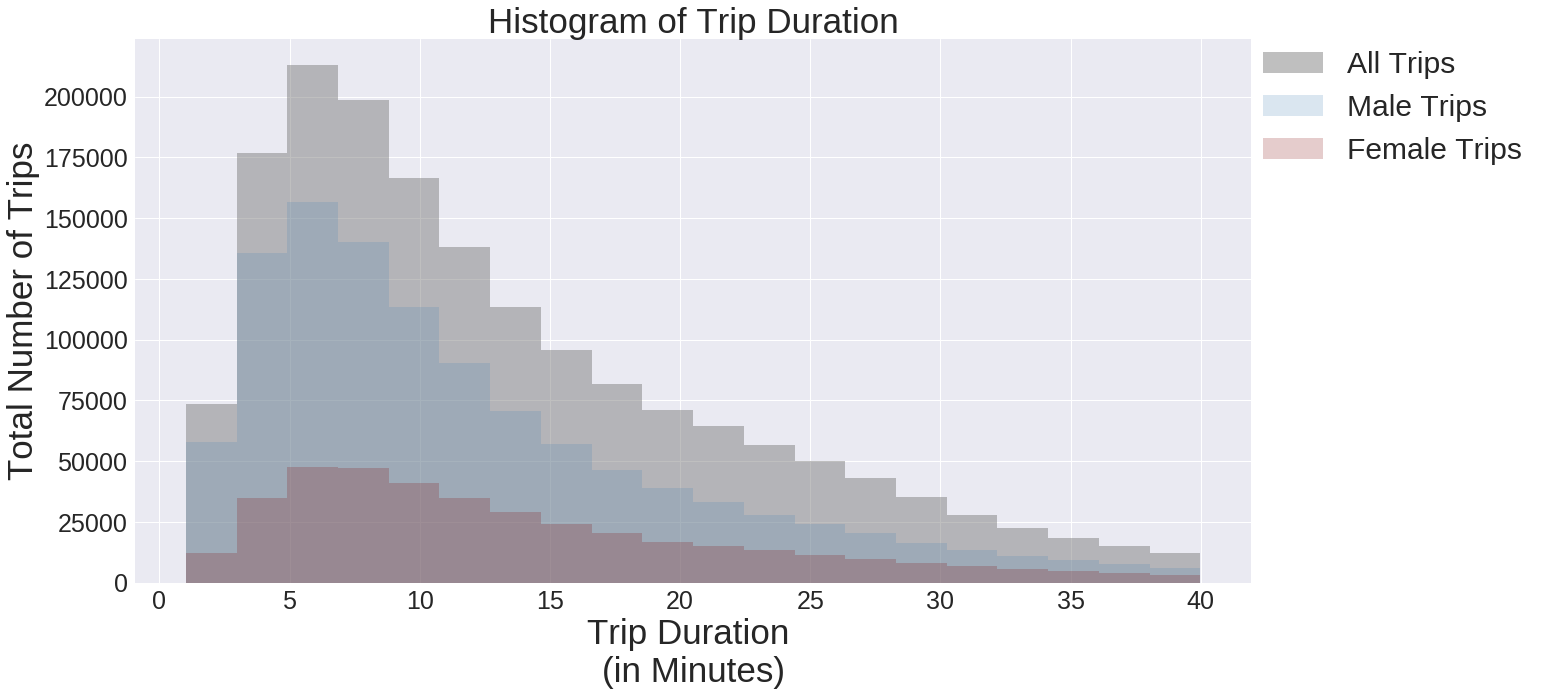

In [22]:

hist(histTotal.tripduration, bins=20, color="grey", alpha=0.5, label="All Trips")
hist(histMale.tripduration, bins=20, color="SteelBlue", alpha=0.2, label="Male Trips")
hist(histFemale.tripduration, bins=20, color="maroon", alpha=0.2, label="Female Trips")



plt.xlabel("Trip Duration \n(in Minutes)",fontsize="35")
plt.ylabel("Total Number of Trips",fontsize="35")
plt.title("Histogram of Trip Duration",fontsize="35")
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,fontsize="30")

### Figure 4: Histogram showing the trip duration for the total amount of trips taken during July, Total number of male trips in July, and total number of female trips in July.

#### In the histrogram you can see that males made more trips than females. 

In [23]:
genderTD.describe()

,Average Female Trip Duration,Average Male Trip Duration
count,31.000000,31.000000
mean,17.093857,15.356587
std,2.096811,2.271954
min,14.734951,12.826346
25%,15.716917,13.902359
50%,16.465340,14.927783
75%,17.564824,15.765576
max,24.100578,22.380926


## Start Statistical Analysis for HW 7

### $\alpha=0.05$

In [24]:
cbFemale.describe()

,Average Female Trip Duration
count,31.000000
mean,17.093857
std,2.096811
min,14.734951
25%,15.716917
50%,16.465340
75%,17.564824
max,24.100578


In [25]:
cbMale.describe()

,Average Male Trip Duration
count,31.000000
mean,15.356587
std,2.271954
min,12.826346
25%,13.902359
50%,14.927783
75%,15.765576
max,22.380926


In [26]:
femaleMean = cbFemale['Average Female Trip Duration'].mean()
femaleMean

17.093857166553622

In [27]:
maleMean = cbMale['Average Male Trip Duration'].mean()
maleMean

15.356587118861645

In [28]:
femaleStdev = cbFemale['Average Female Trip Duration'].std()
femaleStdev

2.0968108143892423

In [29]:
maleStdev = cbMale['Average Male Trip Duration'].std()
maleStdev

2.271954090539094

In [30]:
# calculate difference between Male and Female Means

meanDifference = femaleMean - maleMean
meanDifference

1.7372700476919771

In [31]:
# how many std are we from mean

meanDifference / maleStdev

0.76465895808649642

In [32]:
# run the ztest

ztest = (meanDifference) / (maleStdev / np.sqrt(31))
ztest

4.2574408965527297

### we can reject the null hypothesis because the z-test had a result of 4.25.  This is more than 4 standard deviations away from the mean due to our significance level $\alpha=0.05$.